In [1]:
using Pkg
Pkg.activate("./")
Pkg.instantiate()

  Activating project at `~/github_repositories/my_repositories/FEMTISE_TUTORIAL/test/tdse`
   Installed Tables ─ v1.12.0
Precompiling project...
  ✓ Wayland_jll
  ✓ Xorg_xcb_util_jll
  ✓ Xorg_libxkbfile_jll
  ✓ Tables
  ✓ Xorg_libXrandr_jll
  ✓ Xorg_libXcursor_jll
  ✓ Xorg_libXi_jll
  ✓ Xorg_xcb_util_image_jll
  ✓ Xorg_xcb_util_keysyms_jll
  ✓ HarfBuzz_jll
  ✓ Xorg_xcb_util_renderutil_jll
  ✓ Xorg_xcb_util_wm_jll
  ✓ Xorg_xkbcomp_jll
  ✓ Mustache
  ✓ libass_jll
  ✓ Xorg_xcb_util_cursor_jll
  ✓ Xorg_xkeyboard_config_jll
  ✓ HTTP
  ✓ xkbcommon_jll
  ✓ FFMPEG_jll
  ✓ WebSockets
  ✓ GLFW_jll
  ✓ Vulkan_Loader_jll
  ✓ FFMPEG
  ✓ Mux
  ✓ Qt6Base_jll
  ✓ GR_jll
  ✓ WebIO
  ✓ JSExpr
  ✓ GR
  ✓ Blink
  ✓ PlotlyJS
  ✓ Gridap
  ✓ GridapDistributed
  ✓ GridapGmsh
  ✓ Plots
  ✓ Plots → FileIOExt
  ✓ Plots → UnitfulExt
  38 dependencies successfully precompiled in 143 seconds. 236 already precompiled.
  1 dependency errored. To see a full report either run `import Pkg; Pkg.precompile()` or load the 

Following code block need to be specific of computer resource where we are running notebook

In [2]:
computer = "notebook"

if computer == "notebook"
    kernel_dir = "mendez"
elseif computer == "pcfamaf"
    kernel_dir = "martin"
elseif computer == "ccad"
    kernel_dir = "martinmendez"
end

FEMTISE_PATH = "/home/$(kernel_dir)/github_repositories/my_repositories/FEMTISE.jl"

"/home/mendez/github_repositories/my_repositories/FEMTISE.jl"

In [3]:
develop_package = true
develop_package ? Pkg.develop(path=FEMTISE_PATH) : nothing

   Resolving package versions...
    Updating `~/github_repositories/my_repositories/FEMTISE_TUTORIAL/test/tdse/Project.toml`
  [0bd82848] ~ FEMTISE v1.0.0-DEV `/home/martin/github_repositories/my_repositories/FEMTISE.jl` ⇒ v1.0.0-DEV `~/github_repositories/my_repositories/FEMTISE.jl`
  [56d4f2e9] ↓ Gridap v0.18.3 ⇒ v0.18.2
    Updating `~/github_repositories/my_repositories/FEMTISE_TUTORIAL/test/tdse/Manifest.toml`
  [0bd82848] ~ FEMTISE v1.0.0-DEV `/home/martin/github_repositories/my_repositories/FEMTISE.jl` ⇒ v1.0.0-DEV `~/github_repositories/my_repositories/FEMTISE.jl`
  [56d4f2e9] ↓ Gridap v0.18.3 ⇒ v0.18.2
  [bd369af6] ↓ Tables v1.12.0 ⇒ v1.11.1
  [44cfe95a] ↑ Pkg v1.9.0 ⇒ v1.9.2
  [e66e0078] ↑ CompilerSupportLibraries_jll v1.0.2+0 ⇒ v1.0.5+0
  [8e850b90] ↑ libblastrampoline_jll v5.7.0+0 ⇒ v5.8.0+0


In [4]:
install_pkg = false
if install_pkg
    Pkg.add("Revise")
    Pkg.add("Plots")
    Pkg.add("PlotlyJS")
    Pkg.add("Gridap")
end
using Revise;
using FEMTISE;
using Plots;
using Gridap;

In [5]:
include("./plot_post_proccesing_data.jl")
include("./evolution_schroedinger_equation.jl")

evolution_schroedinger_by_euler_02

In [6]:
simulation_info, output_data = collect_result_data(true,"./input")

(InputData1D{Tuple{String, String}, Params1D, Bool}("./output", "./adhoc_potential_function", Params1D("1D", 100.0, "s", 0.1, 10, 0.0, "qho_1d", (1.0, 0.0)), false, ("jld2", "all")), DefaultJLD2AllEigenProblem{Vector{Float64}, Vector{VectorValue{1, Float64}}, Gridap.Geometry.BodyFittedTriangulation{1, 1, Gridap.Geometry.UnstructuredDiscreteModel{1, 1, Float64, Gridap.Geometry.Oriented}, Gridap.Geometry.UnstructuredGrid{1, 1, Float64, Gridap.Geometry.Oriented, Nothing}, Gridap.Arrays.IdentityVector{Int64}}, BoundaryTriangulation{0, 1, Gridap.Geometry.BodyFittedTriangulation{0, 1, Gridap.Geometry.UnstructuredDiscreteModel{1, 1, Float64, Gridap.Geometry.Oriented}, Gridap.Geometry.GridView{0, 1, Gridap.Geometry.UnstructuredGrid{0, 1, Float64, Gridap.Geometry.NonOriented, Nothing}, Vector{Int64}}, Vector{Int64}}, Gridap.Geometry.FaceToCellGlue{Vector{Int64}, FillArrays.Fill{Int64, 1, Tuple{Base.OneTo{Int64}}}, Gridap.Arrays.LazyArray{FillArrays.Fill{Reindex{Vector{Int8}}, 1, Tuple{Base.OneT

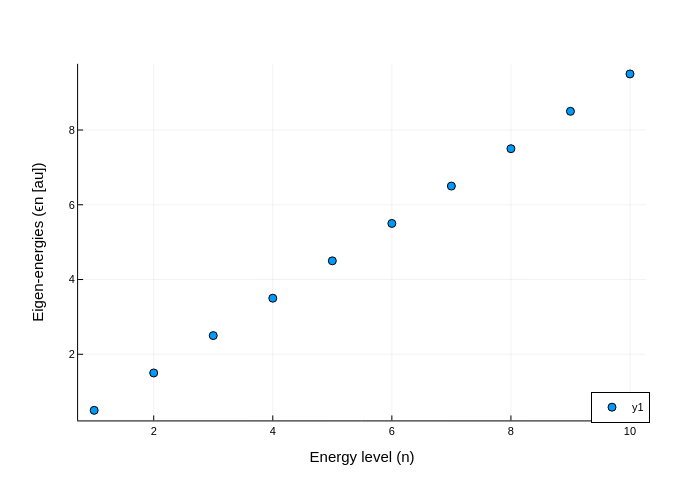

In [13]:
fig1 = plot_eigenvalues(simulation_info, output_data)
display(fig1)

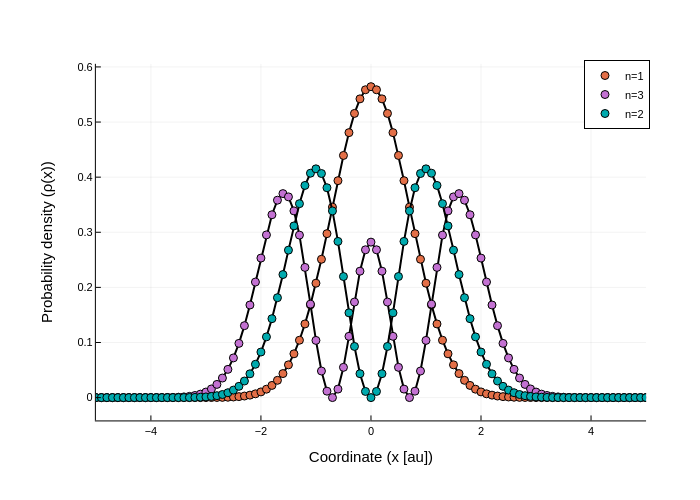

In [27]:
range_to_show=range(1,step=1,length=3)
fig2 = plot_eigenstates(simulation_info, output_data,range_to_show)
fig2 = plot!(fig2,xlim=(-5,5))
display(fig2)

In [31]:
fieldnames(typeof(output_data))

(:ϵ, :ϕ, :r, :pts, :Ω, :dΩ, :Γ, :dΓ, :USpace, :VSpace, :model)

In [7]:
init_wave_function = (output_data.ϕ[1]+output_data.ϕ[2])/sqrt(2)

OperationCellField():
 num_cells: 1000
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 9972973705223638532

In [88]:
time=[0.0 + i*1 for i in 0:10]

11-element Vector{Float64}:
  0.0
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

In [89]:
wave_function = evolution_schrodinger(init_wave_function,output_data.ϕ,output_data.ϵ,output_data.USpace,output_data.dΩ,time)

11-element Vector{CellField}:
 SingleFieldFEFunction()
 SingleFieldFEFunction()
 SingleFieldFEFunction()
 SingleFieldFEFunction()
 SingleFieldFEFunction()
 SingleFieldFEFunction()
 SingleFieldFEFunction()
 SingleFieldFEFunction()
 SingleFieldFEFunction()
 SingleFieldFEFunction()
 SingleFieldFEFunction()

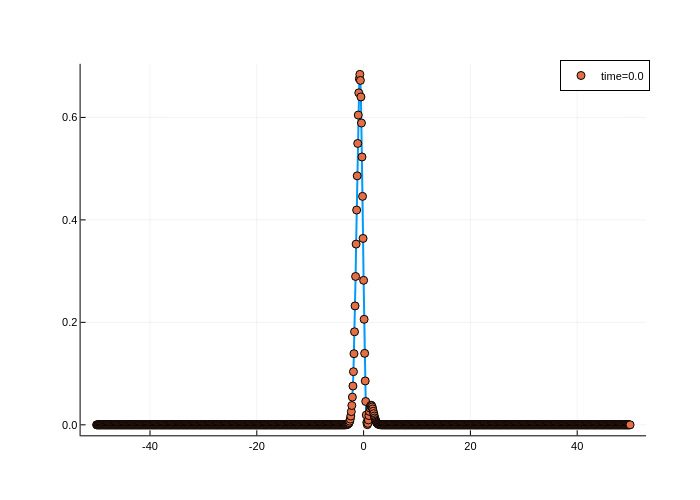

In [113]:
plotlyjs()
figure = plot()
for index_time in [1]
    rho = real.(conj.(wave_function[index_time].(output_data.pts)).*(wave_function[index_time].(output_data.pts)))
    figure = plot!(figure,output_data.r,rho,lw=2,label="")
    figure = scatter!(figure,output_data.r,rho,lw=2,label="time=$(time[index_time])")
end
display(figure)

┌ Info: Saved animation to /home/martin/github_repositories/my_repositories/FEMTISE_TUTORIAL/test/tdse/wave_function.gif
└ @ Plots /home/martin/.julia/packages/Plots/du2dt/src/animation.jl:156


Plots.AnimatedGif("/home/martin/github_repositories/my_repositories/FEMTISE_TUTORIAL/test/tdse/wave_function.gif")
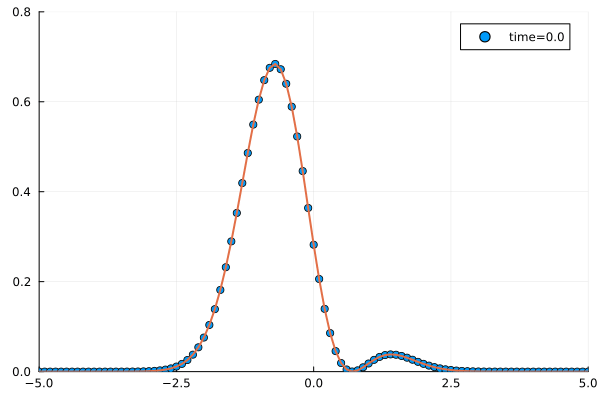

In [111]:
gr()
anim = @animate for index_time in eachindex(time)
    rho = real.(conj.(wave_function[index_time].(output_data.pts)).*(wave_function[index_time].(output_data.pts)))
    scatter(output_data.r,rho,label="time=$(time[index_time])",xlim=(-5,5),ylim=(0,0.8))
    plot!(output_data.r,rho,lw=2,label="")
end
gif(anim, "./wave_function.gif", fps = 1)

In [121]:
specific_time=500.0
wave_function_specific_time = evolution_schrodinger(init_wave_function,output_data.ϕ,output_data.ϵ,output_data.USpace,output_data.dΩ,specific_time)

SingleFieldFEFunction():
 num_cells: 1000
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 17054870472661200815

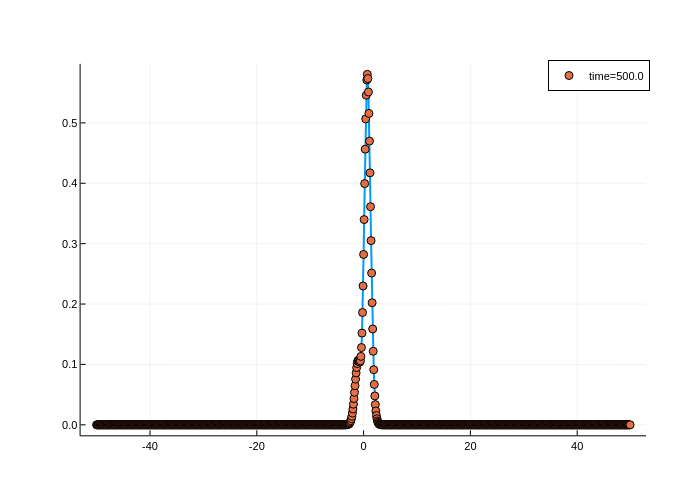

In [124]:
plotlyjs()
rho = real.(conj.(wave_function_specific_time.(output_data.pts)).*(wave_function_specific_time.(output_data.pts)))
figure = plot(output_data.r,rho,lw=2,label="")
figure = scatter!(figure,output_data.r,rho,lw=2,label="time=$(specific_time)")
display(figure)

In [138]:
sum(abs2,initial_coefficients(init_wave_function,output_data.ϕ,output_data.dΩ))

1.0000000000000002

In [8]:
init_wave_function = (output_data.ϕ[1]+output_data.ϕ[2])/sqrt(2)

OperationCellField():
 num_cells: 1000
 DomainStyle: ReferenceDomain()
 Triangulation: BodyFittedTriangulation()
 Triangulation id: 9972973705223638532

In [9]:
time=[0.0 + i*0.1 for i in 0:100]

101-element Vector{Float64}:
  0.0
  0.1
  0.2
  0.30000000000000004
  0.4
  0.5
  0.6000000000000001
  0.7000000000000001
  0.8
  0.9
  ⋮
  9.200000000000001
  9.3
  9.4
  9.5
  9.600000000000001
  9.700000000000001
  9.8
  9.9
 10.0

In [24]:
function autocorrelation(
    initial_wave_function::CellField,
    eigen_states::Vector{CellField},
    eigen_energies::Vector{ComplexF64},
    differential_interior_FE_domain::Gridap.CellData.GenericMeasure,
    time::Vector{Float64})
    autocorr=similar(time)
    Planck_constant=1.0
    coeffvec=initial_coefficients(initial_wave_function,eigen_states,differential_interior_FE_domain)
    for i in eachindex(time)
        factor = 0.0
        for j in eachindex(coeffvec)
            factor += abs2(coeffvec[j])*exp(-im*(1.0/Planck_constant)*time[i]*eigen_energies[j])
        end
        autocorr[i] = abs2(factor)
    end
    return autocorr;
end

autocorrelation (generic function with 1 method)

In [25]:
autocorr = autocorrelation(init_wave_function,output_data.ϕ,output_data.ϵ,output_data.dΩ,time)

101-element Vector{Float64}:
 1.0000000000000004
 0.9975020748568172
 0.9900332579473519
 0.977668175453796
 0.9605303755779826
 0.938791094084746
 0.9126675433654332
 0.882420742116728
 0.8483529073199902
 0.8108044345796706
 ⋮
 0.012576590879366722
 0.003886435091873601
 0.00015329749501319213
 0.0014144784818501668
 0.007657376709596234
 0.018819615008453496
 0.034789663635617876
 0.05540795464707539
 0.08046847625271819

https://en.wikipedia.org/wiki/Rabi_cycle

In [236]:
real(output_data.ϵ[2])-real(output_data.ϵ[1])/2

1.2500016890807821

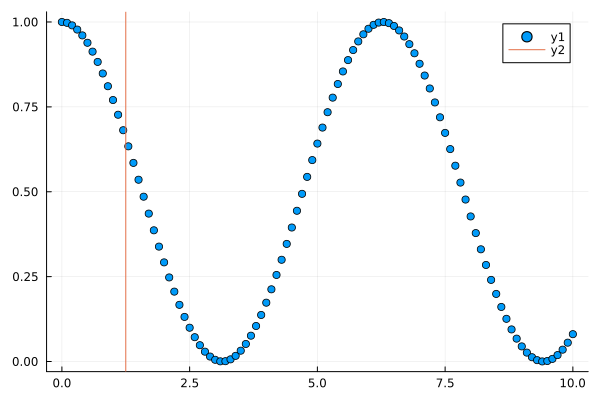

In [26]:
scatter(time,autocorr)
plot!([1.25],seriestype="vline")